# Przetwarzanie Grafiki i Muzyki - laboratorium nr 12

## Zadanie 1 (2 punkty)

W zadaniu tym będziemy rozważać sygnały w postaci $g\left(t\right) = A\cdot \sin\left( 2\pi\cdot f \cdot t + \phi \right)$,
gdzie $A>0$ jest amplitudą sygnału, $f$ jest częstotliwością, a $\phi$ jest przesunięciem fazowym. Ponadto rozważać będziemy $t\in [0,1]$. Proszę wygenerować dziedzinę czasu jako
```
t = np.linspace(0, 1, 0.001)
```
Ujednolicenie dziedziny czasu będzie przydatne w zadaniu nr 3, kiedy będziemy musieli analizować PSD. Następnie:
  * Wygeneruj i narysuj sygnał o:
    * amplitudzie jeden (A = 1),
    * zerowym przesunięciu w fazie (phi = 0),
    * częstotliwości 25 Hz.
  * Wygeneruj i narysuj sygnał o:
    * amplitudzie jeden (A = 1),
    * zerowym przesunięciu w fazie (phi = 0),
    * częstotliwości 40 Hz.
  * Wygeneruj i narysuj sygnał będący sumą powyższych.

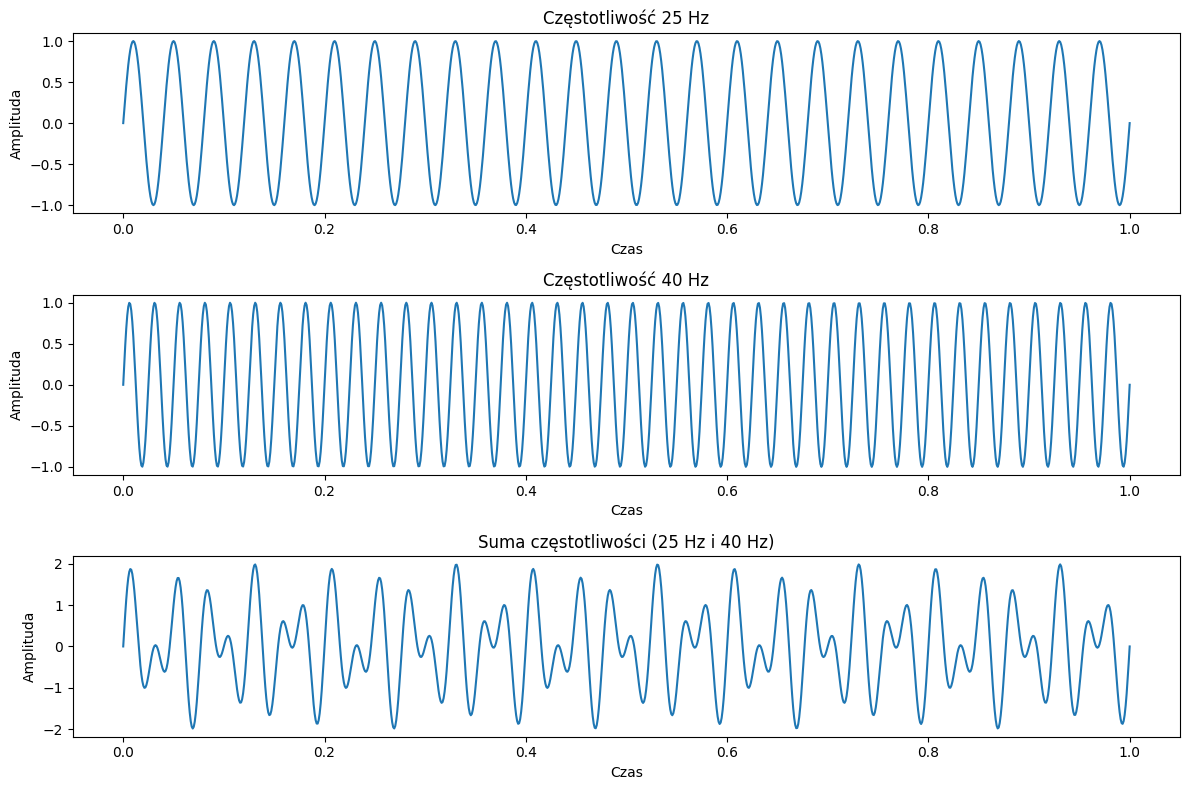

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)

A = 1
phi = 0
f1 = 25
f2 = 40

g1 = A * np.sin(2 * np.pi * f1 * t + phi)
g2 = A * np.sin(2 * np.pi * f2 * t + phi)
g_sum = g1 + g2

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, g1)
plt.title('Częstotliwość 25 Hz')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.subplot(3, 1, 2)
plt.plot(t, g2)
plt.title('Częstotliwość 40 Hz')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.subplot(3, 1, 3)
plt.plot(t, g_sum)
plt.title('Suma częstotliwości (25 Hz i 40 Hz)')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()


## Zadanie 2 (4 punkty)
Proszę wziąć sumę sygnałów z poprzedniego zadania, a następnie:
* Dokonać na niej FFT (Fast Fourier Transform) i narysować wykres w dziedzinie częstotliwości (proszę pamiętać, że FFT może mieć wartości zespolone, stąd potrzeba wzięcia modułu). (2 punkty)
* Dokonać IFFT (Inverse Fast Fourier Transorm) na sygnale przekształconym przez FFT i porównać oryginalny sygnał (przed FFT) z sygnałem otrzymanym po zaaplikowaniu IFFT. (2 punkty)

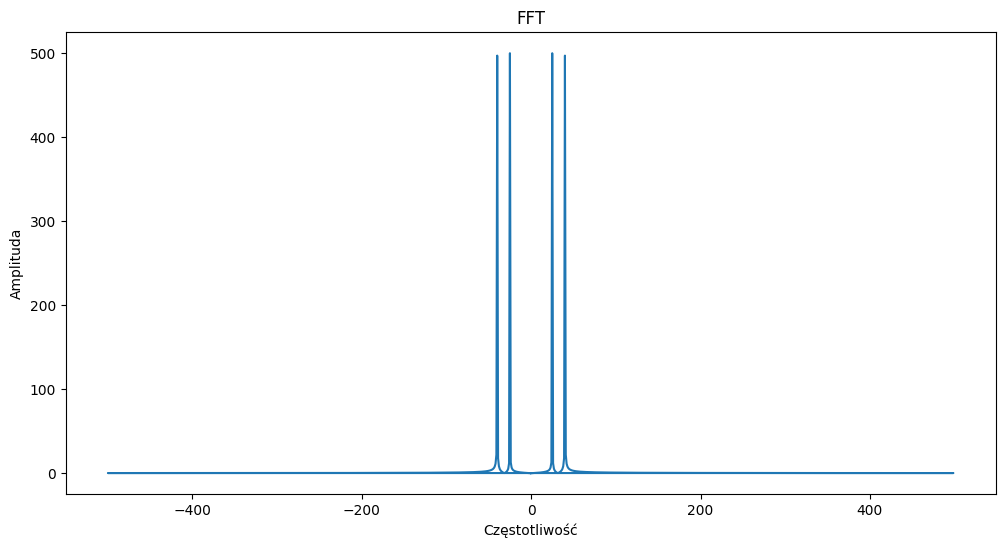

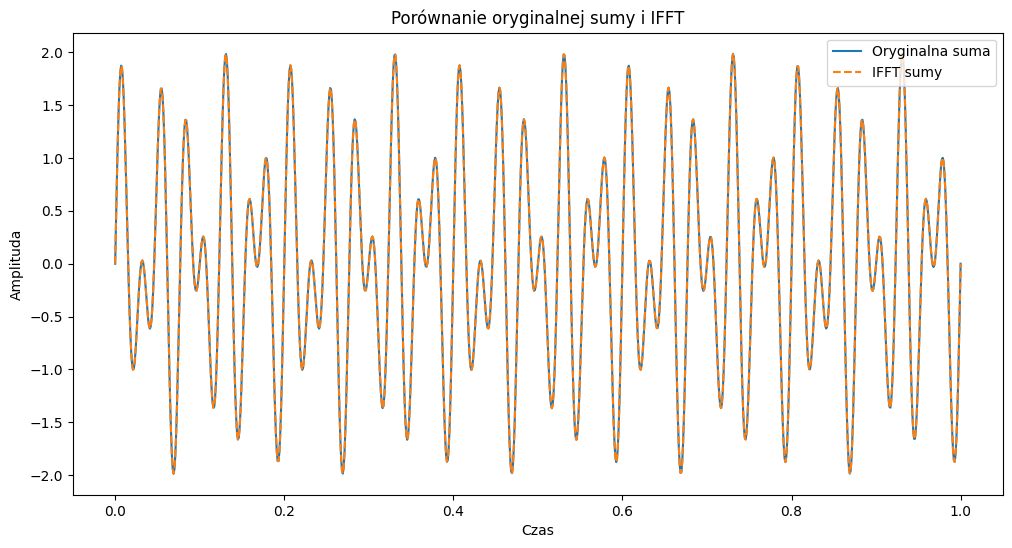

In [7]:
g_sum_fft = np.fft.fft(g_sum)
frequencies = np.fft.fftfreq(t.shape[0], d=(t[1] - t[0]))

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(g_sum_fft))
plt.title('FFT')
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.show()

g_sum_ifft = np.fft.ifft(g_sum_fft)

plt.figure(figsize=(12, 6))
plt.plot(t, g_sum, label='Oryginalna suma')
plt.plot(t, g_sum_ifft.real, linestyle='dashed', label='IFFT sumy')
plt.title('Porównanie oryginalnej sumy i IFFT')
plt.xlabel('Czas')
plt.ylabel('Amplituda')
plt.legend()
plt.show()


## Zadanie 3 (4 punkty)

Proszę wziąć sygnał z pierwszego zadania i dodać do niego szum gaussowski $\mathcal{N}\left(0,1\right)$, a następnie:
1) Dokonaj FFT na tym sygnale. (1 punkt)
2) Porównaj wykres transformaty Fouriera (z szumem Gaussa) z transformatą Fouriera sygnału niezaszumionego. Wystarczy narysować te dwa wykresy obok siebie. (1 punkt)
3) Prostym progowaniem usuń szum z transformaty Fouriera - w tym celu proszę przenalizować PSD (Power Spectral Density) i wybrać sensowny próg (uzasadnić wybór!), a następnie wyznaczyć nowe współczynniki, korzystając ze wzoru:
$$
\hat{f}\left(\omega_k\right) = \begin{cases}
                                0, & PSD\left(\omega_k\right) \leq T ,  \\
                                \hat{f}\left(\omega_k\right), & PSD\left(\omega_k\right) > T.
                            \end{cases}
$$ (1 punkt)
4) Dokonaj IFFT, uwzględniając współczynniki z punktu nr 3, i policz MSE pomiędzy sygnałem oryginalnym a sygnałem odszumionym. (1 punkt)

HINT:
$$
PSD\left(\omega_k\right) = \frac{|\hat{f}\left(\omega_k\right)|^2}{n},
$$
gdzie $\hat{f}\left(\omega_k\right) = \sum_{j=0}^{n-1}f_j\cdot e^{-i\cdot 2\pi j \omega_k}$, $i$ jest jednostką urojoną, $f_j$ to $j$-ta wartość wygnału, a $n$ jest liczbą próbek. Z racji tego, że dziedzina czasu $t$ została wygenerowana jako ```t = np.linspace(0, 1, 0.001)```, to $\omega_k = \frac{k}{0.001\cdot n}$, gdzie $k\in\lbrace 0, 1, \ldots, n-1\rbrace$.

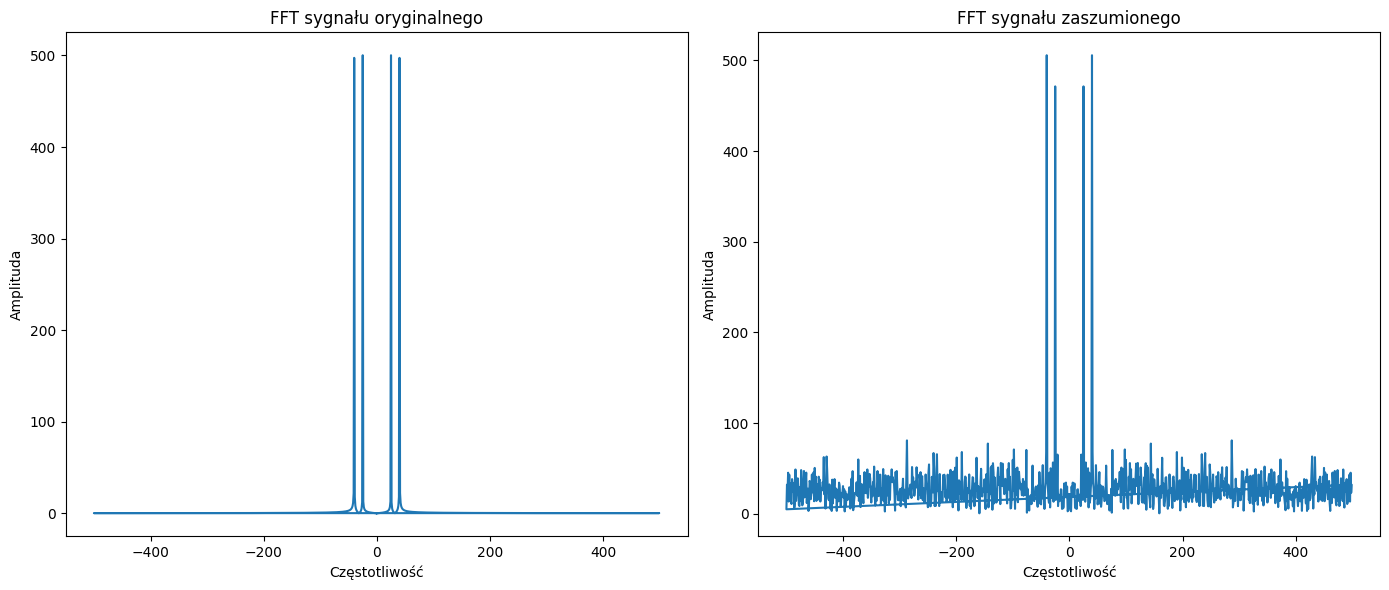

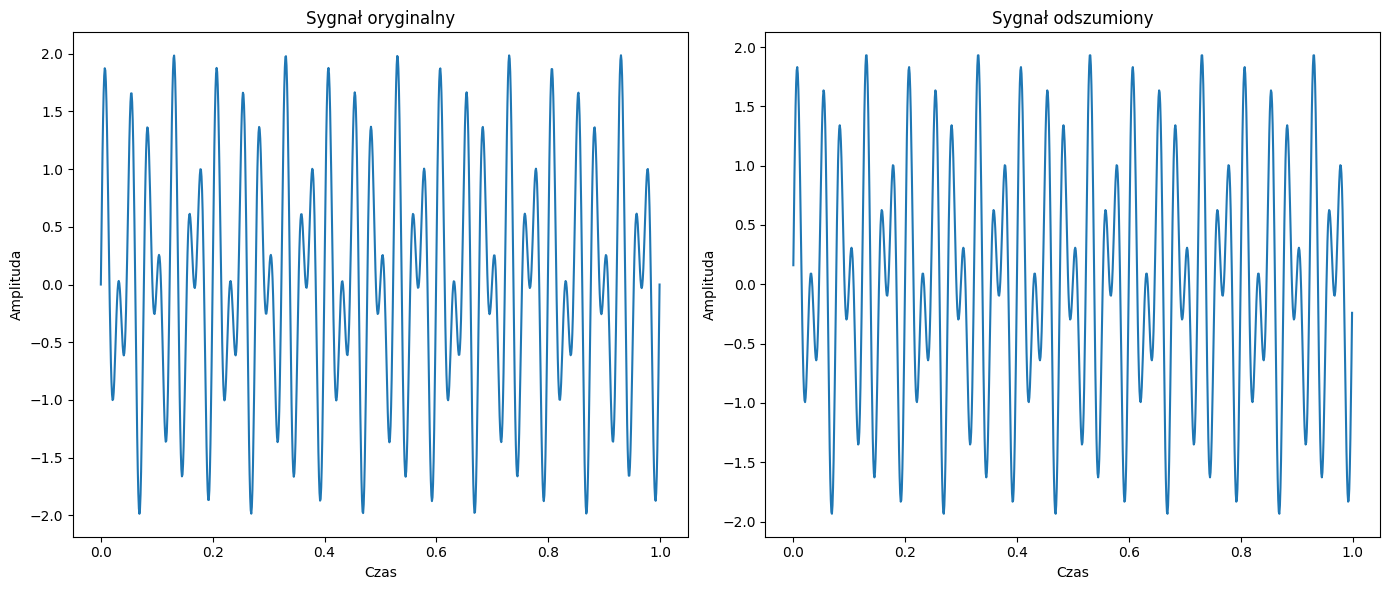

MSE między sygnałem oryginalnym a odszumionym: 0.005907290031742892


In [13]:
import numpy as np
import matplotlib.pyplot as plt

signal = g_sum

noise = np.random.normal(0, 1, t.shape)
noisy_signal = signal + noise

fft_noisy = np.fft.fft(noisy_signal)
fft_original = np.fft.fft(signal)
freq = np.fft.fftfreq(t.shape[0], d=t[1]-t[0])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(freq, np.abs(fft_original))
plt.title('FFT sygnału oryginalnego')
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')

plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(fft_noisy))
plt.title('FFT sygnału zaszumionego')
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

psd = np.abs(fft_noisy) ** 2 / len(noisy_signal)
threshold = np.mean(psd) * 4  
# Przyjmujemy 4-krotność średniej wartości jako próg.
# Wartości powyżej średniej mogą być uznane za bardziej istotne,
# podczas gdy wartości poniżej średniej mogą być bardziej prawdopodobne jako wynik szumu.
# Następnie skalujemy wynik przez 4, gdyż otrzymujemy wtedy lepszy wynik.

fft_denoised = np.where(psd > threshold, fft_noisy, 0)

denoised_signal = np.fft.ifft(fft_denoised).real
mse = np.mean((signal - denoised_signal) ** 2)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Sygnał oryginalny')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title('Sygnał odszumiony')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

print(f"MSE między sygnałem oryginalnym a odszumionym: {mse}")
